In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

In [2]:
dementia = pd.read_csv(r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\dementia_dataset.csv")


In [3]:
print(dementia)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  

In [4]:
dementia.shape

(373, 15)

In [5]:
dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [9]:
dementia.isnull().sum()


Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [10]:

dementia['SES'].fillna(0)
dementia['MMSE'].fillna(0)

0      27.0
1      30.0
2      23.0
3      28.0
4      22.0
       ... 
368    28.0
369    26.0
370    30.0
371    30.0
372    30.0
Name: MMSE, Length: 373, dtype: float64

In [11]:
dementia = dementia.rename(columns = {'M/F' : 'Gender'})

C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_15920\519903021.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dementia.corr(), annot = True, cmap = 'OrRd')


<Axes: >

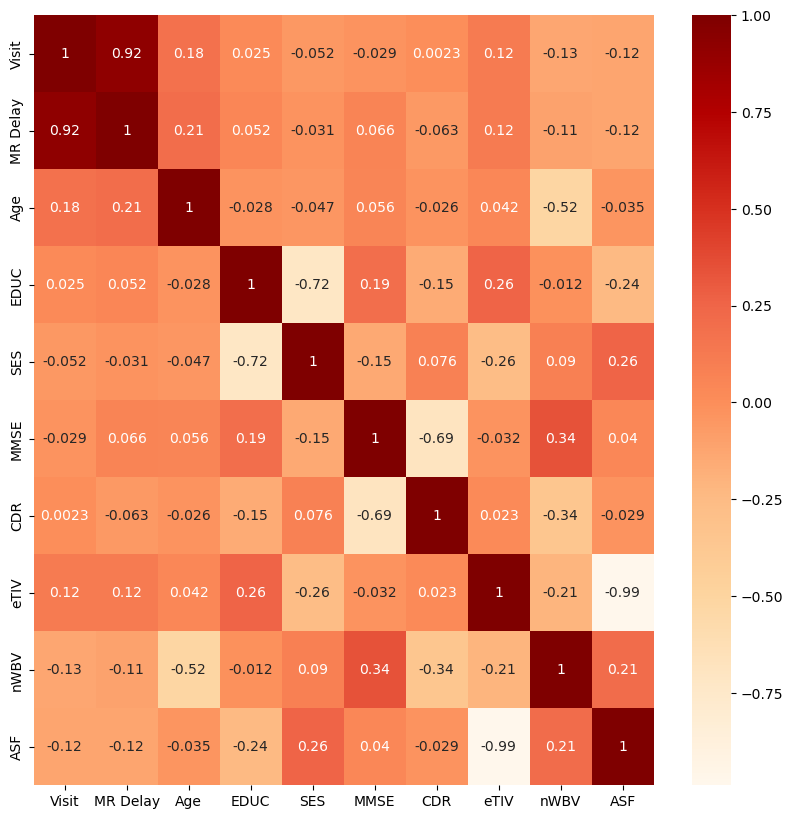

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(dementia.corr(), annot = True, cmap = 'OrRd')

In [13]:
#how are mrdelay and visits so much correlated


In [14]:
df = dementia[['eTIV', 'nWBV', 'ASF', 'CDR', 'Group']]
df.head()

,eTIV,nWBV,ASF,CDR,Group
0,1987,0.696,0.883,0.0,Nondemented
1,2004,0.681,0.876,0.0,Nondemented
2,1678,0.736,1.046,0.5,Demented
3,1738,0.713,1.010,0.5,Demented
4,1698,0.701,1.034,0.5,Demented


In [15]:
Demented = df[df['CDR'] == 0.5]
NonDemented = df[df['CDR'] == 0.0]
df.Group[df.Group == 'Nondemented'] = 1
df.Group[df.Group == 'Demented'] = 2
df.Group[df.Group == 'Converted'] = 3
df['Group'] = df['Group'].astype(int)

C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_15920\3328018651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Group[df.Group == 'Nondemented'] = 1
C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_15920\3328018651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Group[df.Group == 'Demented'] = 2
C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_15920\3328018651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [16]:
X = df.drop('Group', axis = 1)
y = df['Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(261, 4)
(261,)
(112, 4)
(112,)


In [17]:
svm = SVC(kernel = 'linear', gamma = 'auto', C = 5)
svm.fit(X_train, y_train)
print(svm)


SVC(C=5, gamma='auto', kernel='linear')


In [18]:
y_pred = svm.predict(X_test)
print(y_pred)

[1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 1 1
 1 2 1 1 1 1 1 2 2 1 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2 2 1 1
 1 2 2 2 1 2 1 1 2 1 2 1 2 1 1 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 2 1 2 2 2 1
 1]


In [19]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')


Accuracy Score :  0.8928571428571429
Percentage :  89 %


In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('Root Mean Squared Error : ', rmse)



Root Mean Squared Error :  0.5428101483418094


In [21]:
matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
print(matrix)



Predicted   1   2
Actual           
1          60   0
2           0  40
3           7   5


In [22]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           1       0.90      1.00      0.94        60
           2       0.89      1.00      0.94        40
           3       0.00      0.00      0.00        12

    accuracy                           0.89       112
   macro avg       0.59      0.67      0.63       112
weighted avg       0.80      0.89      0.84       112



C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARSHITA MEHRA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'ASF ~ nWBV')

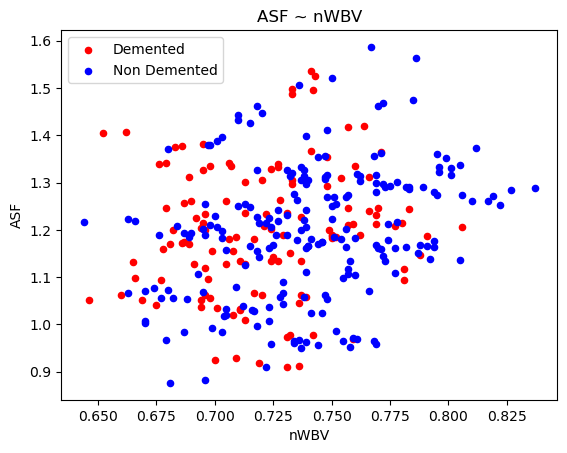

In [23]:
result = Demented.plot(kind='scatter', x = 'nWBV', y = 'ASF', label = 'Demented', color='red')
NonDemented.plot(kind='scatter', x = 'nWBV', y = 'ASF', label = 'Non Demented', color='blue', ax = result)
plt.title("ASF ~ nWBV")

ValueError: could not convert string to float: 'Nondemented'

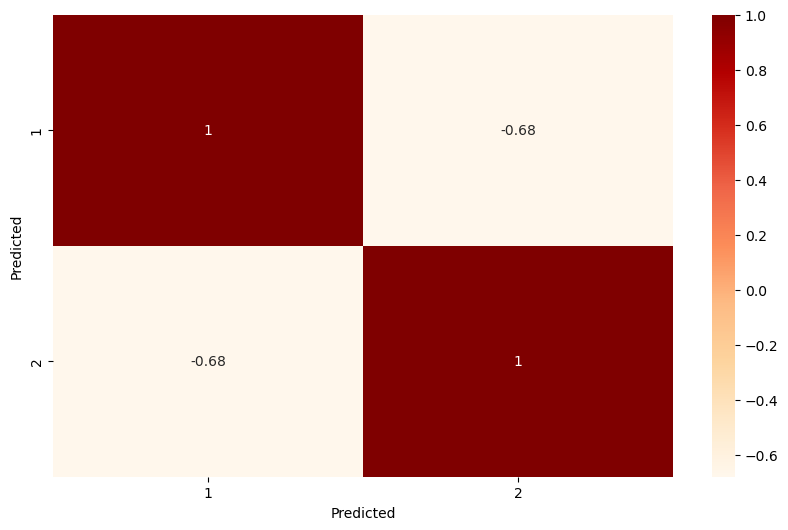

<Figure size 1000x600 with 0 Axes>

In [24]:
plt.figure(figsize = (10,6))
sns.heatmap(matrix.corr(), annot = True, cmap = 'OrRd')

plt.figure(figsize = (10,6))
sns.countplot(dementia['Group'])
plt.title("Classification of Dementia")
plt.show()

C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_15920\10286756.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Group'])


AttributeError: module 'matplotlib.pyplot' has no attribute 'tiplt'

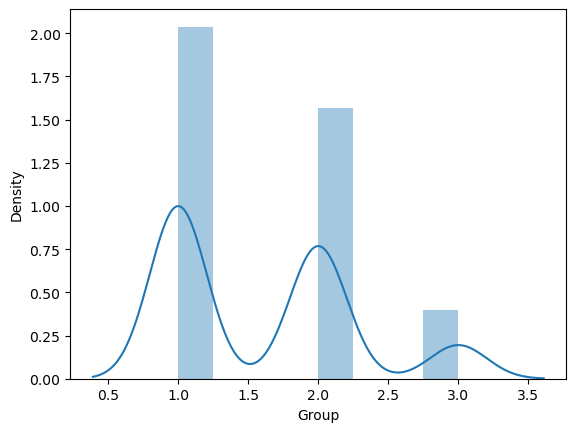

In [25]:
sns.distplot(df['Group'])
plt.tiplt.figure(figsize = (10,6))
tle("Distribution Group of Dementia")
plt.show()


In [26]:
#secondcode from here onwards


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [29]:
df = pd.read_csv (r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\dementia_dataset.csv")
df.rename ( columns = { 'Group': 'Dementia'}, inplace=True ) # rename
df.rename ( columns = { 'M/F': 'Sex'}, inplace=True ) # rename
df.drop(columns=['Subject ID', 'MRI ID'], inplace=True) # drop
df.head(10).style.set_properties(**{'background-color':'black',
                                     'color': 'orchid'})
print ( "Let's see the values ​​of the `Hand` column:", df.Hand.unique(), '\n' )
print ( 'Unique value in this column is R. We can drop it.' )
df.drop(columns=['Hand'], inplace=True)


Let's see the values ​​of the `Hand` column: ['R'] 

Unique value in this column is R. We can drop it.


In [30]:
col = df.columns
new_col = []
for columns in col:
  columns_low = columns.title()
  new_col.append (columns_low)
df.columns = new_col

df.describe().T.style.background_gradient( cmap='tab10')

df.info()

df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dementia  373 non-null    object 
 1   Visit     373 non-null    int64  
 2   Mr Delay  373 non-null    int64  
 3   Sex       373 non-null    object 
 4   Age       373 non-null    int64  
 5   Educ      373 non-null    int64  
 6   Ses       354 non-null    float64
 7   Mmse      371 non-null    float64
 8   Cdr       373 non-null    float64
 9   Etiv      373 non-null    int64  
 10  Nwbv      373 non-null    float64
 11  Asf       373 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 35.1+ KB


Dementia     0
Visit        0
Mr Delay     0
Sex          0
Age          0
Educ         0
Ses         19
Mmse         2
Cdr          0
Etiv         0
Nwbv         0
Asf          0
dtype: int64

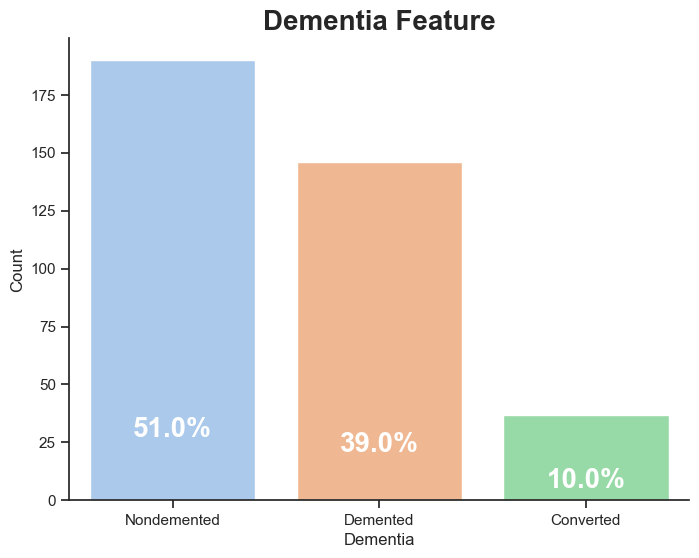

In [31]:
df.Ses.fillna ( df.Ses.mode() [0], inplace=True ) # impute mode
df.Mmse.fillna ( df.Mmse.mean() , inplace=True ) # impute mean
df.isna().sum()

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette='pastel')
fig = plt.figure ( figsize= (8,6) )
ax=sns.countplot(data=df, x='Dementia')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=20, weight='bold', rotation=360, color='white')
plt.title("Dementia Feature", size=20, weight='bold')
plt.ylabel ( 'Count' )
plt.show()

In [36]:
plt.figure ( figsize= (8,6) )





<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

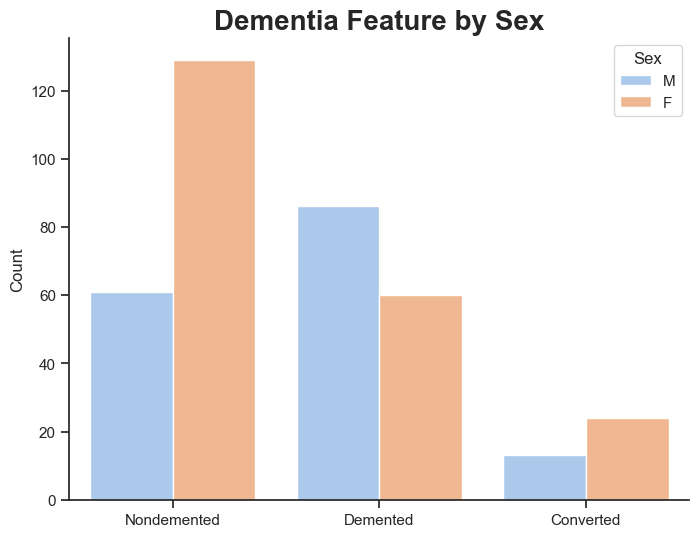

In [48]:

plt.figure ( figsize= (8,6) )
sns.countplot(x='Dementia', data=df, hue='Sex')
plt.title("Dementia Feature by Sex", size=20, weight='bold')
plt.ylabel ( 'Count' )
plt.xlabel ('', size = 16 )
plt.show()





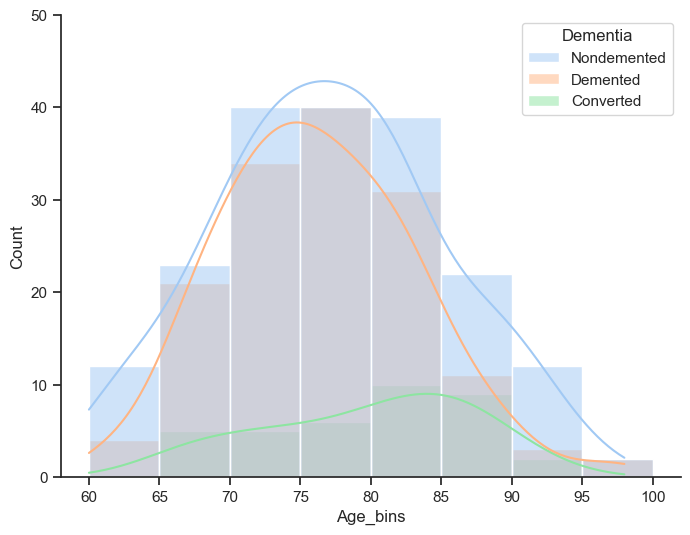

In [49]:
plt.figure ( figsize= (8,6) )
sns.histplot( data=df, x="Age", binwidth=5, kde=True, hue="Dementia" )
plt.xlabel ('Age_bins' )
plt.ylim(0,50)
plt.show()

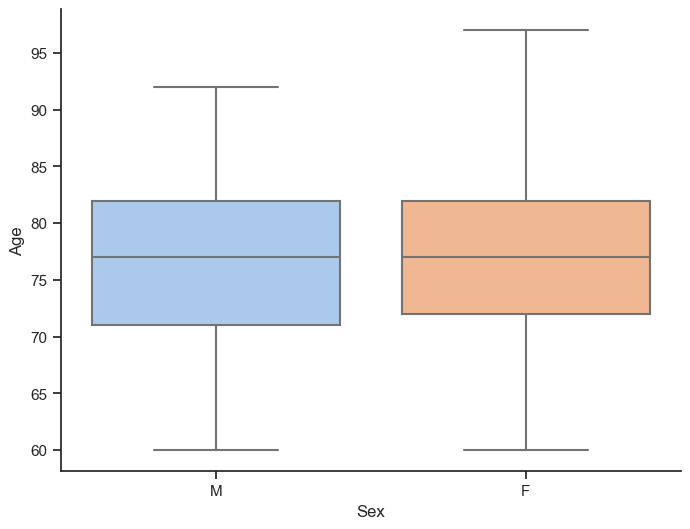

In [50]:
plt.figure ( figsize= (8,6) )
sns.boxplot( data=df,y="Age", x='Sex', showfliers = False )
plt.show ()

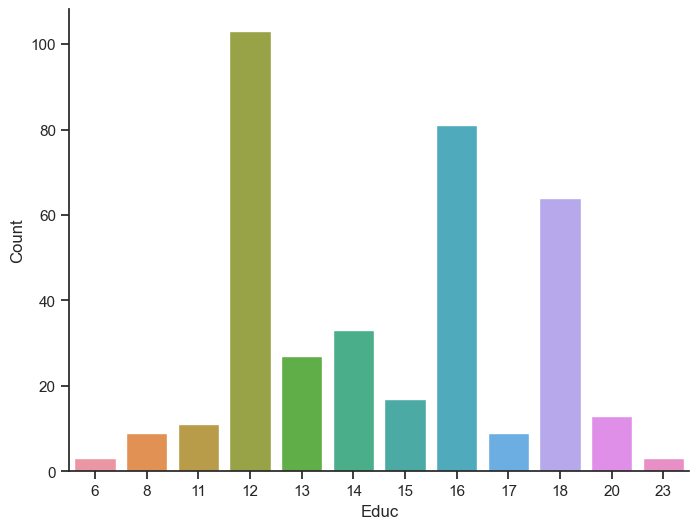

In [52]:
plt.figure ( figsize= (8,6) )
sns.countplot ( x='Educ', data=df )
plt.ylabel ('Count')
plt.show ()

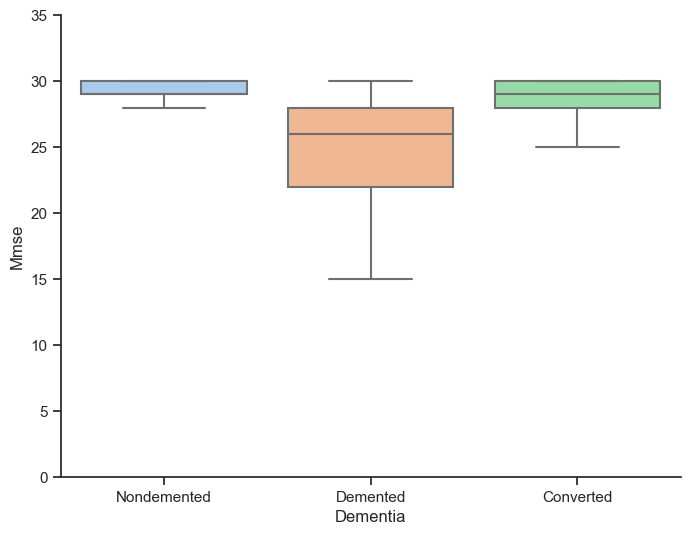

In [53]:
plt.figure ( figsize= (8,6) )
sns.boxplot(x="Dementia", y="Mmse", data=df, showfliers = False ) # without outliers
plt.ylim(0,35)
plt.show ()

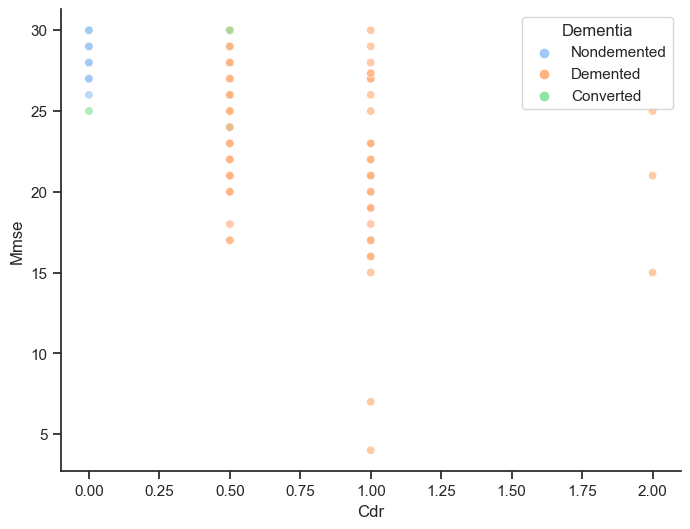

In [54]:
plt.figure ( figsize= (8,6) )
sns.scatterplot(data=df, x="Cdr", y="Mmse", hue="Dementia", alpha=0.7)
plt.show()


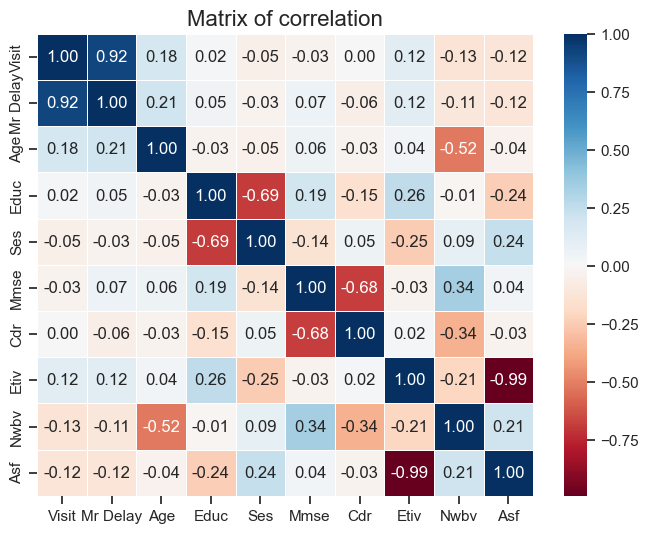

In [55]:
corr = df.corr ()
plt.figure ( figsize= (8,6) )
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.7, cbar = True, cmap='RdBu' )
plt.title ( 'Matrix of correlation', size = 16)
plt.show ()

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder ()
df.Sex = le.fit_transform ( df.Sex.values )
print ( 'Sex:\n0 : %s \n1 : %s\n\n' %(le.classes_[0], le.classes_[1]) )
df.Dementia = le.fit_transform ( df.Dementia.values )
print ( 'Dementia:\n0 : %s \n1 : %s \n2 : %s' %(le.classes_[0], le.classes_[1], le.classes_[2]) )

df.Dementia = df.Dementia.astype('category')
df.Sex = df.Sex.astype('category')

df.info()

Sex:
0 : F 
1 : M


Dementia:
0 : Converted 
1 : Demented 
2 : Nondemented
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dementia  373 non-null    category
 1   Visit     373 non-null    int64   
 2   Mr Delay  373 non-null    int64   
 3   Sex       373 non-null    category
 4   Age       373 non-null    int64   
 5   Educ      373 non-null    int64   
 6   Ses       373 non-null    float64 
 7   Mmse      373 non-null    float64 
 8   Cdr       373 non-null    float64 
 9   Etiv      373 non-null    int64   
 10  Nwbv      373 non-null    float64 
 11  Asf       373 non-null    float64 
dtypes: category(2), float64(5), int64(5)
memory usage: 30.2 KB


In [57]:

from sklearn.model_selection import train_test_split

X, y = df.drop ('Dementia', axis=1).values , df.Dementia.values
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.2, random_state = 1, stratify = y)

In [58]:
from imblearn.over_sampling import SMOTE

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

smt = SMOTE ()
X_train, y_train = smt.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

Number of observations in the target variable before oversampling of the minority class: [ 29 117 152]

Number of observations in the target variable after oversampling of the minority class: [152 152 152]


In [59]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

clf = [ LogisticRegression(random_state=42), DecisionTreeClassifier(random_state=42), SVC (random_state=42),
       RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42) ]
models = [ 'Logistic Regression', 'Tree', 'Support vector machine', 'RFC', 'Gradient boost' ]

In [60]:
for clf, model in zip(clf,models):
  clf.fit ( X_train_std, y_train )
  y_pred = clf.predict ( X_test_std )
  print ( f'Cross validation score of {model}: %.3f \n' %cross_val_score (clf, X_train_std, y_train, cv=5).mean() )


Cross validation score of Logistic Regression: 0.844 

Cross validation score of Tree: 0.902 

Cross validation score of Support vector machine: 0.901 

Cross validation score of RFC: 0.928 

Cross validation score of Gradient boost: 0.924 



In [61]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_jobs=-1, random_state=42) 

param_grid = { 
    'n_estimators': [500, 700, 900],
    'min_samples_split': [2,4,6,8,10]
}

In [63]:
gs = GridSearchCV ( estimator = rfc,
                   param_grid = param_grid,
                   scoring = 'accuracy',
                   cv = 5,
                   refit = True,
                   n_jobs = -1
                   )

In [64]:
gs = gs.fit ( X_train_std, y_train )

print ( 'Parameter setting that gave the best results on the hold out data:', gs.best_params_ )

print ( 'Mean cross-validated score of the best_estimator: %.3f' %gs.best_score_ )


Parameter setting that gave the best results on the hold out data: {'min_samples_split': 2, 'n_estimators': 700}
Mean cross-validated score of the best_estimator: 0.934


In [65]:
gs = gs.best_estimator_

gs.fit ( X_train_std, y_train )
y_pred = gs.predict ( X_test_std )
print ( f'Accuracy train score: %.4f' %gs.score (X_train_std, y_train) )
print ( f'Accuracy test score: %.4f' %accuracy_score ( y_test, y_pred ) )

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (  y_test, y_pred )

print ('Number of records in the test dataset: %d\n' %y_test.shape[0])

Accuracy train score: 1.0000
Accuracy test score: 0.9333
Number of records in the test dataset: 75



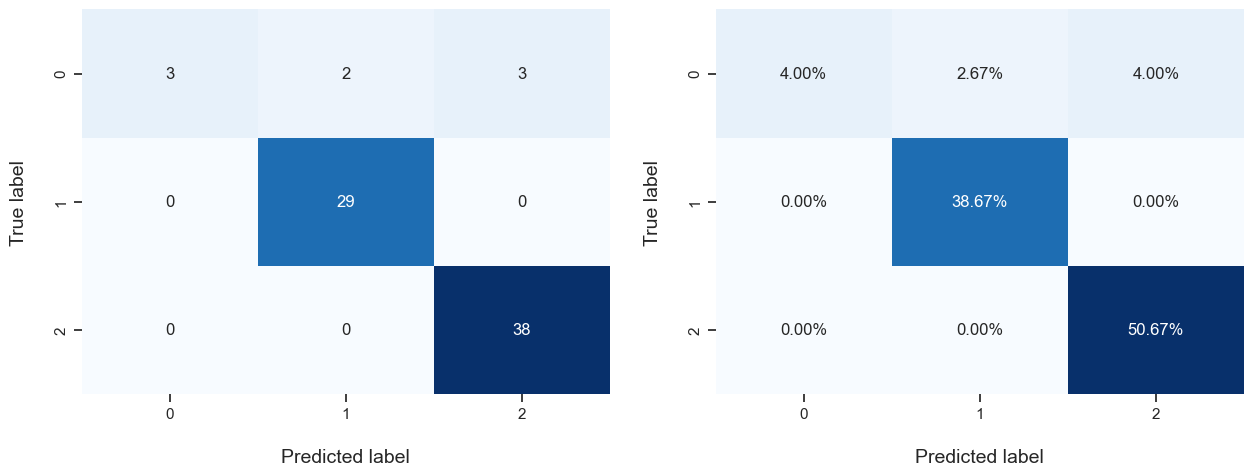

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)


# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()